**1 - Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.**

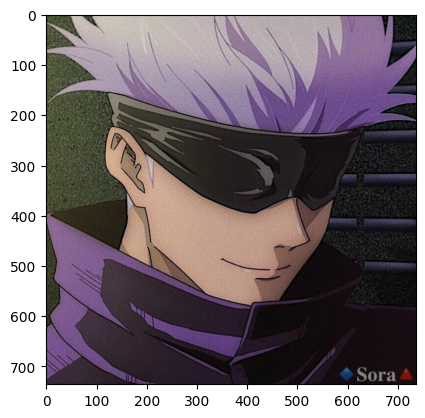

In [21]:
from skimage.io import imread
from skimage.draw import rectangle, set_color
import matplotlib.pyplot as plt
import numpy as np

img = imread('https://i.pinimg.com/736x/88/f1/04/88f104c0e869d5842d9c168434ebc894.jpg')

plt.imshow(img)

In [22]:
custom_image = np.asarray(img.copy())
height, width, _ = img.shape
print(height, width)

736 736


In [36]:
square_width = int(width * 0.1)
square_height = int(height * 0.1)
print(square_width, square_height)

73 73


In [37]:
x0 = height // 2 - square_height
print(x0)
y0 = width // 2 - square_width
print(y0)

295
295


In [39]:
left_top_coordinats = (x0, y0)
right_bottom_coordinats = (x0 + square_width * 2, y0 + square_height * 2)
print(left_top_coordinats, right_bottom_coordinats)

(295, 295) (441, 441)


[array([[295, 296, 297, ..., 439, 440, 441],
       [295, 296, 297, ..., 439, 440, 441],
       [295, 296, 297, ..., 439, 440, 441],
       ...,
       [295, 296, 297, ..., 439, 440, 441],
       [295, 296, 297, ..., 439, 440, 441],
       [295, 296, 297, ..., 439, 440, 441]]), array([[295, 295, 295, ..., 295, 295, 295],
       [296, 296, 296, ..., 296, 296, 296],
       [297, 297, 297, ..., 297, 297, 297],
       ...,
       [439, 439, 439, ..., 439, 439, 439],
       [440, 440, 440, ..., 440, 440, 440],
       [441, 441, 441, ..., 441, 441, 441]])]


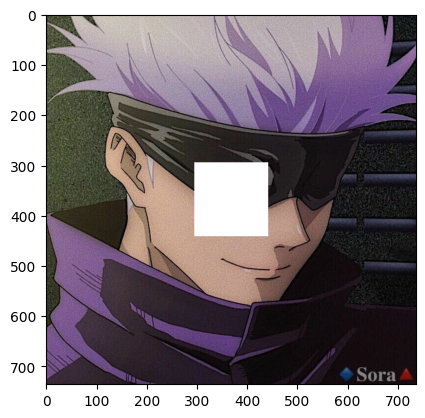

In [40]:
square = rectangle(left_top_coordinats, right_bottom_coordinats, shape=img.shape)
print(square)
set_color(img, square, [255, 255, 255])
plt.imshow(img)

**2 - Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.**

360 640
213 460
(213, 460) (263, 510)


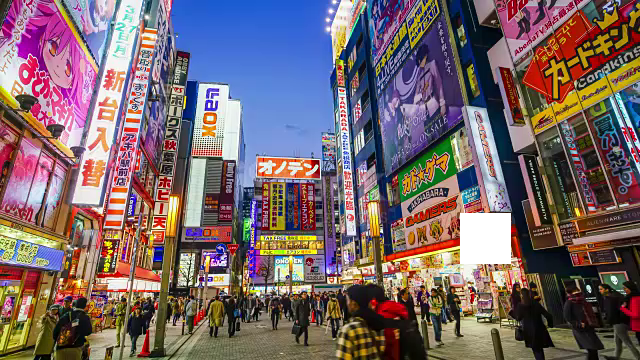

360 640
94 584
(94, 584) (144, 634)


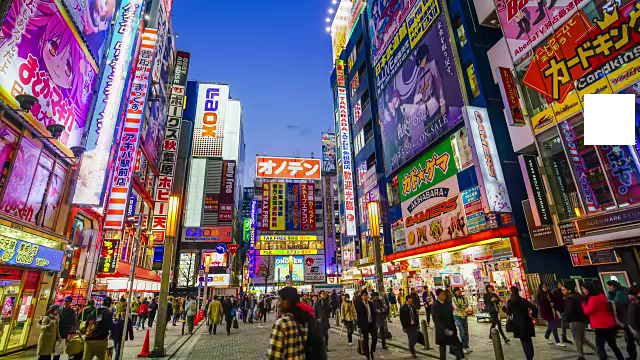

In [19]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage.draw import rectangle, set_color

url = 'https://media.istockphoto.com/id/671247984/ru/%D0%B2%D0%B8%D0%B4%D0%B5%D0%BE/%D0%B0%D0%BA%D0%B8%D1%85%D0%B0%D0%B1%D0%B0%D1%80%D0%B0-%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%B8%D0%BA%D0%B8-%D0%BA%D0%BE%D0%BD%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D1%82%D0%BE%D1%80-%D0%B2-%D1%81%D1%83%D0%BC%D0%B5%D1%80%D0%BA%D0%B0%D1%85.mp4?s=mp4-640x640-is&k=20&c=Bi8J9K5LQjwUd87sd5OiYlt_hr35FgBzh25OxvAPWk0='
capture = cv2.VideoCapture(url)
k = 0
size = 50

while True and k < 2: ## чтоб не засорять много кадров сделал на двух
    k+=1
    rtrn, image = capture.read()
    if image is None:
        break

    custom_image = np.asarray(image.copy())
    height, width, _ = image.shape
    print(height, width)

    x = np.random.randint(0, height - size)
    y = np.random.randint(0, width - size)
    print(x, y)

    left_top_coordinats = (x, y)
    right_bottom_coordinats = (x + size, y + size)
    print(left_top_coordinats, right_bottom_coordinats)

    square = rectangle(left_top_coordinats, right_bottom_coordinats, shape=image.shape)

    set_color(image, square, [255, 255, 255])

    cv2_imshow(image)
    if cv2.waitKey(1) == 2:
        break

capture.release()
cv2.destroyAllWindows()

**3 -**

- Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
- визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
- построить спектрограмму для найденного участка;
- подумать (и реализовать), как с помощиью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

In [6]:
import soundfile as sf
import io
from urllib.request import urlopen
import IPython.display as ipd
import numpy as np

In [7]:
audio_data = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-110389-A-0.wav'

data, srate = sf.read(io.BytesIO(urlopen(audio_data).read()))
ipd.Audio(audio_data)

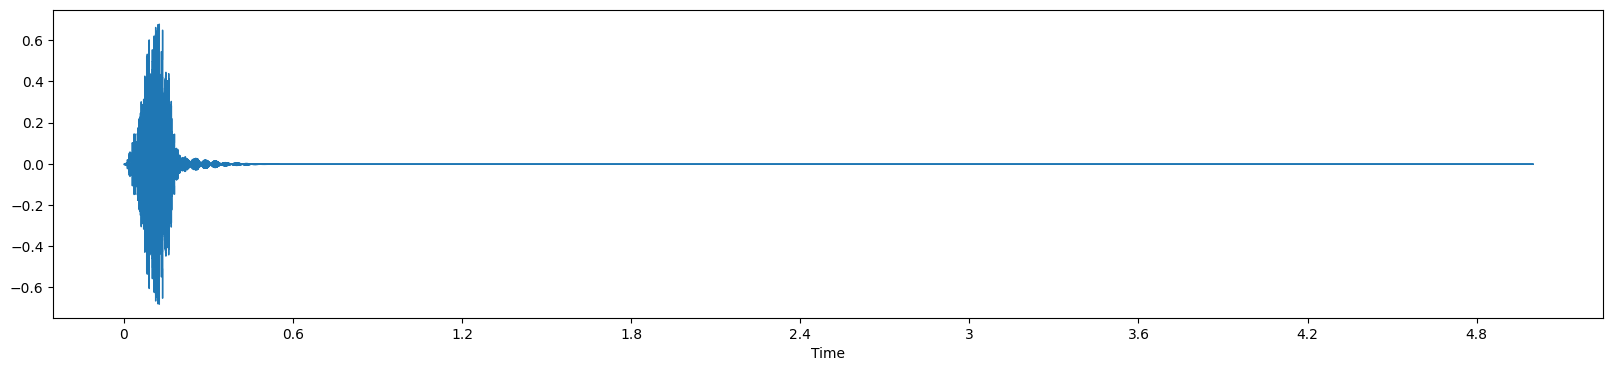

In [8]:
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
librosa.display.waveshow(data, sr=srate)

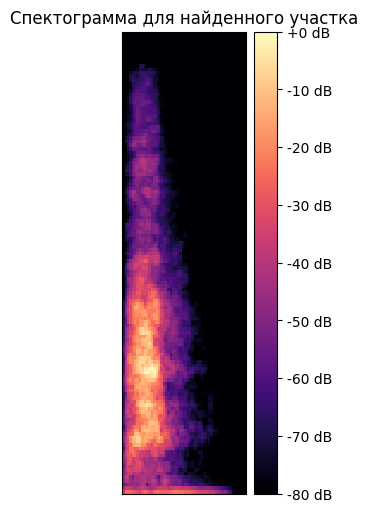

In [15]:
start = 0
end = 0.6
segment = data[int(start * srate):int(end * srate)]

plt.figure(figsize=(2, 6))
S = librosa.feature.melspectrogram(y=segment, sr=srate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=srate)
plt.colorbar(format='%+2.0f dB')
plt.title('Спектограмма для найденного участка')
plt.show()

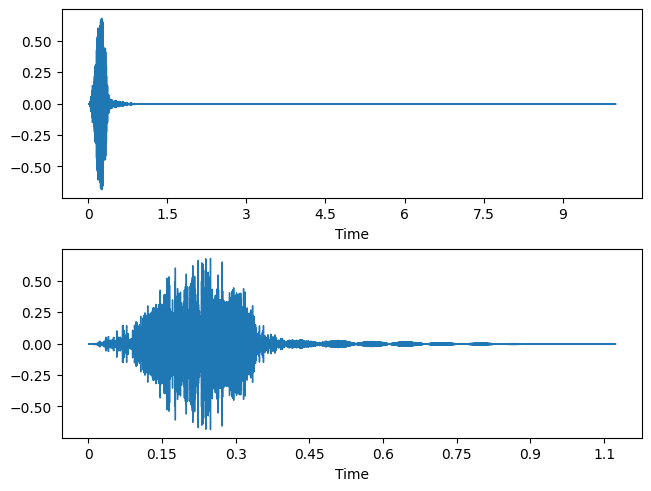

In [16]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)

librosa.display.waveshow(data, ax=ax[0])
data = data[data != 0]
librosa.display.waveshow(data, ax=ax[1])

**4 -**
- Создайте приложения для работы с API VK;
- получите свой токен для автоматизации действий в соцсети;
- соберите не менее 2000 не пустых текстовых сообщений со стены любой открытой группы;
- сохраните сообщения во внешний файл для дальнейшего чтения и работы.

In [40]:
## vk1.a.jwqtP7fHjl6SVGmRnUzqdk5xZcV8JKb0hmtu7Zfkye8G1ztO41lcnfQdTRUWhUvkqXzyjWZLKOcO0NE1JT3phP1W8DrRL1JKcOINkgh_YPFe75xRG8bZouTQb9P2uoyrlDH_5c3BkVNbsuJ5ItBu8FrCY6-sT-4-rGDZkvkhv3ssSfb94XRA3p67IK9_x5n3INFakJM3spcMjtn8QvedRQ

import requests
from datetime import datetime

access_token = 'vk1.a.jwqtP7fHjl6SVGmRnUzqdk5xZcV8JKb0hmtu7Zfkye8G1ztO41lcnfQdTRUWhUvkqXzyjWZLKOcO0NE1JT3phP1W8DrRL1JKcOINkgh_YPFe75xRG8bZouTQb9P2uoyrlDH_5c3BkVNbsuJ5ItBu8FrCY6-sT-4-rGDZkvkhv3ssSfb94XRA3p67IK9_x5n3INFakJM3spcMjtn8QvedRQ'
k = 0
while (k <= 2000):
  json_response = requests.get(('https://api.vk.com/method/wall.get?count={}&offset={}&domain={}&v=5.103&access_token={}').\
                          format(100, 0, 'Alexey', access_token)).json()
  with open('result-api.txt', 'a') as file:
    for item in json_response['response']['items']:
      if (item['text'] != ""):
        file.write(item['text'])
        print(item['text'])
        print()
      k += 1

Уже не 7, а 8.

Вы не думали, что символы рашисткого наступления - буквы Z и V - это Zombie Virus?)
Вас просто прозомбировали, ватники. И послали на убой.

В Иране сейчас - инструкция по правильным протестам для жителей эрефии.

Хотя, кого я обманываю. На россии 99% - терпилы, которые строят из себя пацифистов и "неинтересующихся политикой" :)

В сеть попадают ролики новоиспечённых мобиков. Нет, не из Донбасса, из РФ. 

Такое чувство, что жители запоребрика собираются на субботник. Или скорее всего на сезонные колхозные мероприятия, как при совке, где можно побухать с себе подобными - нескучно провести время(на сколько это возможно),учитывая, что ты там не по своей воле, а как бы так надо - партия велела. 

Чувствуется разброд и шатание. Не видно осознания ситуации. Я бы сказал, что это напоминает чувства северного пушного зверька 

Что тут скажешь? Это чувство обязательно придёт. 

К кому-то раньше, к кому-то позже. Это сейчас ты думаешь, что твоя армия самая сильная в мире, у неё луч